# Early Stopping

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

<Axes: >

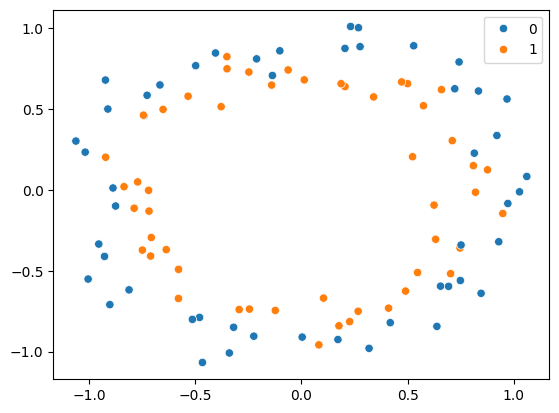

In [22]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [23]:
print(X)

[[-0.63640493 -0.36870191]
 [-0.24465976 -0.73659196]
 [-0.46597138 -1.06687743]
 [-0.70999784 -0.40841948]
 [ 0.70232238 -0.51730147]
 [-0.49776571  0.76955129]
 [-0.31914906 -0.84899624]
 [-0.57839322 -0.49081236]
 [-0.53350227  0.58056527]
 [-0.24733259  0.73011595]
 [ 0.41030774 -0.73075986]
 [ 0.17181003 -0.92504802]
 [ 0.65917045  0.62120588]
 [ 0.87625577  0.12510879]
 [ 0.81946243 -0.01347859]
 [-0.47960986 -0.7880243 ]
 [-0.90187751 -0.70895455]
 [ 0.74827659 -0.55976747]
 [-0.74875324 -0.37153443]
 [ 0.23161178  1.01205842]
 [ 0.81387506  0.22821311]
 [-0.92169575  0.20310719]
 [ 0.74650434 -0.35861224]
 [ 0.01330079  0.68169193]
 [-0.72651409  0.58630948]
 [-0.33930852 -1.0080984 ]
 [ 0.49009938 -0.62509577]
 [-0.9539309  -0.33410313]
 [ 0.6927241  -0.59576417]
 [ 0.003546   -0.9098264 ]
 [-0.35077763  0.82536558]
 [ 0.94798269 -0.14503976]
 [ 0.52327611  0.20621942]
 [ 0.54670705 -0.51026584]
 [ 0.10385825 -0.66844291]
 [ 0.31843503 -0.97937344]
 [ 0.92901189 -0.31993308]
 

In [24]:
print(y)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [26]:
print(y_test)

[0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0]


In [27]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [33]:
history=model.fit(X_train,y_train,epochs=3000,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5586 - loss: 0.6769 - val_accuracy: 0.3500 - val_loss: 0.7192
Epoch 2/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5312 - loss: 0.6774 - val_accuracy: 0.3500 - val_loss: 0.7202
Epoch 3/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5547 - loss: 0.6747 - val_accuracy: 0.3500 - val_loss: 0.7214
Epoch 4/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5586 - loss: 0.6700 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 5/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5961 - loss: 0.6699 - val_accuracy: 0.3500 - val_loss: 0.7238
Epoch 6/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5922 - loss: 0.6659 - val_accuracy: 0.3500 - val_loss: 0.7241
Epoch 7/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5805 - loss: 0.6681 - val_accuracy: 0.3500 - val_loss: 0.7242
Epoch 8/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5570 - loss: 0.6756 - val_accuracy: 0.3500 - v

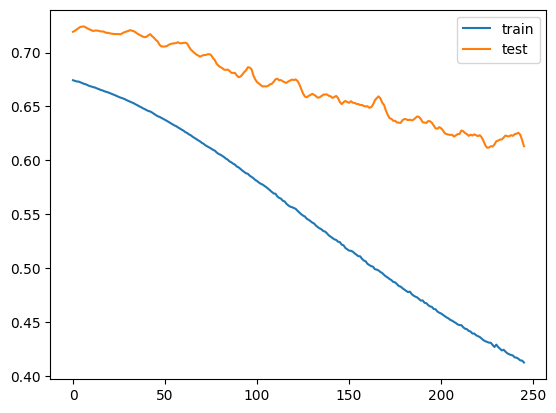

In [34]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


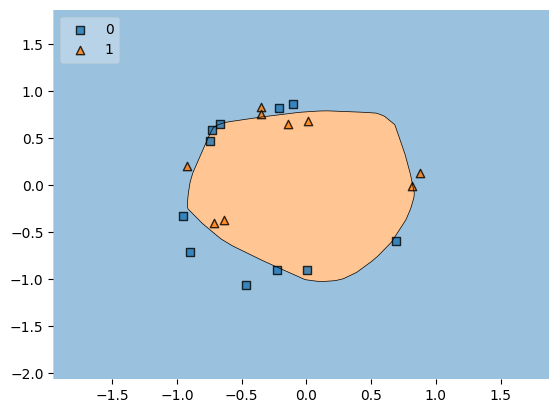

In [35]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()